# Penguins Dataset Simple Linear Regression - Linear Relationship

### [Penguins Dataset](https://seaborn.pydata.org/tutorial/introduction.html)

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

## Citation

[1] Allison Horst, https://github.com/allisonhorst/palmerpenguins

## Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [46]:
df = sns.load_dataset('penguins')

## Perform Essential Exploration & Data Cleaning

### Display the initial number of rows and columns.

In [47]:
df.shape

(344, 7)

### Display the initial variable names and their associated data types.

In [48]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

### Display the number of missing values for each column, remove the missing values and create a clean copy of the dataset.

In [49]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [50]:
df_clean = df.dropna().copy()

In [51]:
df_clean.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Display the number of unique values for each column after removing missing data and before initial exploration.

In [52]:
df_clean.nunique()

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

### Display the number of unique values for the categorical variables after removing missing data and before initial exploration.

In [53]:
df_clean.select_dtypes(exclude='number').nunique()

species    3
island     3
sex        2
dtype: int64

### Display the number of unique values for the continuous variables after removing missing data and before initial exploration.

In [54]:
df_clean.select_dtypes(include='number').nunique()

bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
dtype: int64

## Data Standardization

### Examine raw numeric features magnitude and scale.

The actual values in the boxplot represent the distributions of the penguin dataset’s numeric features: bill length (mm), bill depth (mm), flipper length (mm), and body mass (g). The plot shows that body mass is on a much larger scale than the other features, indicating that its values are much higher (in grams) compared to the millimeter measurements of the other features, which is important for understanding feature scaling and the need for standardization in data analysis.

In [55]:
df_clean.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


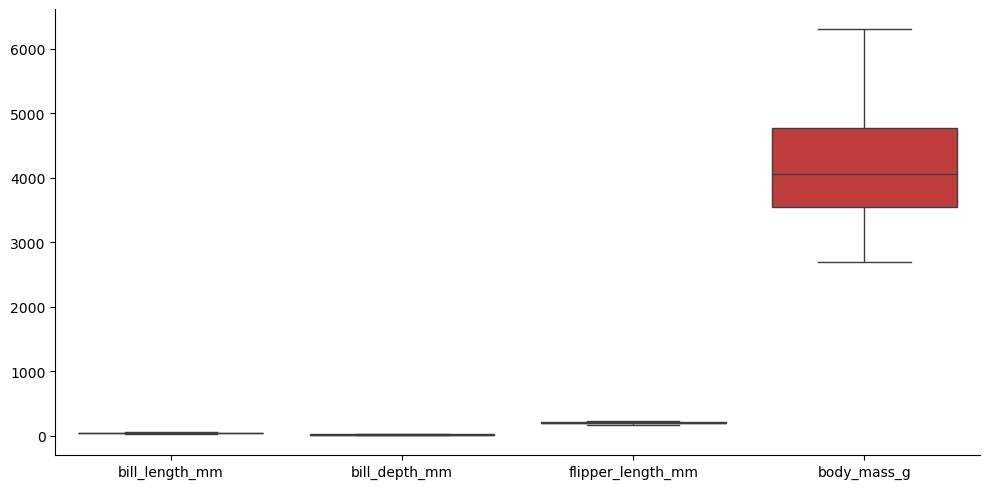

In [56]:
sns.catplot(data=df_clean, 
            kind='box', 
            aspect=2)
plt.show()

### Prepare the dataset by extracting our numeric features.

In [57]:
df_clean_features = df_clean.select_dtypes('number').\
                             copy()

### Standardize the numeric features.

In [58]:
X = StandardScaler().fit_transform(df_clean_features)

### Examine standarized numeric features magnitude and scale.

After standardization, all numeric features (bill length, bill depth, flipper length, and body mass) have similar distributions centered around zero with comparable spread, indicating that differences in scale have been removed and the features are now suitable for clustering and other analyses that assume equal variance.

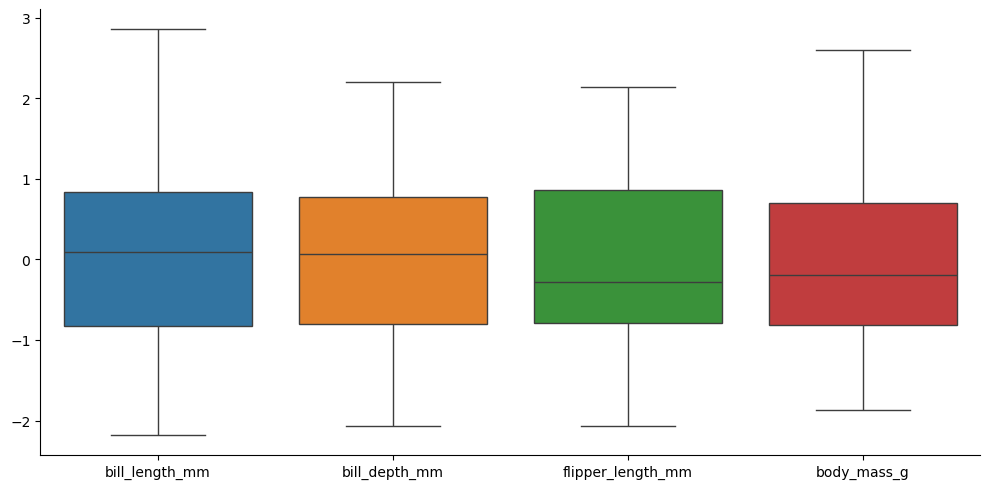

In [59]:
sns.catplot(data=pd.DataFrame(X, 
                              columns=df_clean_features.columns), 
                              kind='box', 
                              aspect=2)
plt.show()

## Simple Linear Regression - Linear Relationship

We will start with a single continuous input that is linearly related to the trend. In our case we will attempt to use `flipper_length_mm` to predict `body_mass_g`.



$\mu = \beta_0 + \beta_1 \times x$

$\mu$ represents the **dependent variable** or **predicted value**.

$\beta_0$ represents the **intercept** of the regression line as this is the value of $\mu$ when $x = 0$.

$\beta_1$ represents the **slope** of the regression line as this tells you how much $\mu$ changes for a one-unit increase in $x$.

$x$ is the **independent variable** or **predictor variable** whose effect on $\mu$ we are modeling.

The predicted value $\mu$ is equal to a constant $\beta_0$, plus $\beta_1$ times the value of $x$.

If you plot this on a graph, you get a straight line.

$\beta_0$ determines where the line crosses the y-axis (vertical axis).

$\beta_1$ determines the angle or steepness of the line.

### Example: predict a penguin's `body_mass_g` $\mu$ from its `flipper_length_mm` $x$.

$\beta_0 = 1000$ intercept

$\beta_1 = 20$ slope

$x = 200$ `flipper_length_mm`

Plug in the values.

$\mu = 1000 + (20 × 200)$

$\mu = 1000 + 4000$

$\mu = 5000$

**A penguin with a flipper length of 200mm is predicted to have a body mass of 5000g.**

### Visualize the trend.

The trend is increasing as the input increases because we have a positive **slope**.

In [60]:
x = df_clean['flipper_length_mm']
y = df_clean['body_mass_g']

In [61]:
my_slope, my_intercept = np.polyfit(x, 
                                    y, 
                                    1)

In [62]:
my_slope

50.153265942241134

In [63]:
my_intercept

-5872.09268284282

In [64]:
df_viz = df_clean.copy()

In [65]:
df_viz['trend'] = my_intercept + my_slope * df_viz['flipper_length_mm']

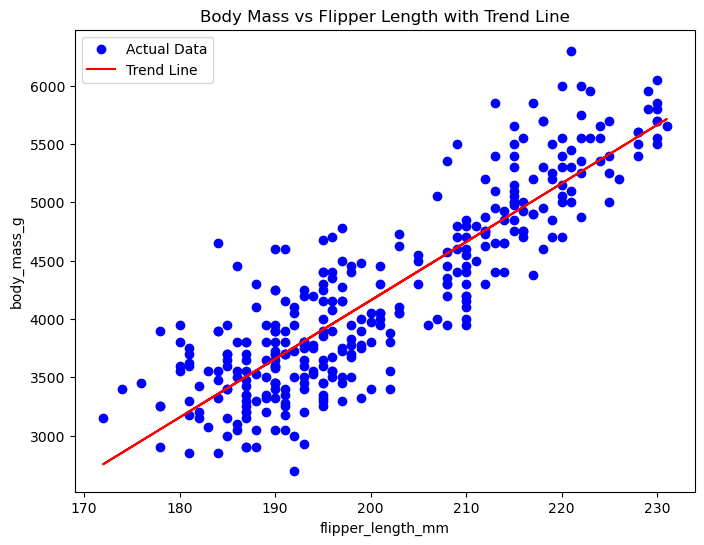

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(df_viz['flipper_length_mm'], df_viz['body_mass_g'], color='blue', label='Actual Data')
plt.plot(df_viz['flipper_length_mm'], df_viz['trend'], color='red', label='Trend Line')
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.title('Body Mass vs Flipper Length with Trend Line')
plt.legend()
plt.show()

### Calculating $\sigma$.

The likelihood of an output around the trend is a Gaussian distribution and the variation of a Gaussian is specified by the **standard deviation** or **$\sigma$**.

To calculate **sigma ($\sigma$)**, the **standard deviation** of the residuals in linear regression, use the following formula.

$\sigma = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \mu_i)^2 }$

where:
- $y_i$ is the actual observed value for the $i$th point,
- $\mu_i$ is the predicted value for the $i$th point (from your regression line),
- $n$ is the number of data points.

Step-by-step explanation.

1. **Calculate the residuals:** $y_i - \mu_i$.
2. **Square the residuals:** $(y_i - \mu_i)^2$.
3. **Sum squared residuals:** $\sum_{i=1}^{n} (y_i - \mu_i)^2$.
4. **Divide by the number of points:** $\frac{1}{n} \sum_{i=1}^{n} (y_i - \mu_i)^2$.
5. **Take the square root:** $\sqrt{ \cdot }$.

If you want the **sample standard deviation** (which is common), use $n-1$ in the denominator.

$\sigma = \sqrt{ \frac{1}{n-1} \sum_{i=1}^{n} (y_i - \mu_i)^2 }$

**$\sigma$ measures how much your actual values deviate from the values predicted by the regression line.**

In [67]:
my_residuals = df_viz['body_mass_g'] - df_viz['trend']

In [68]:
my_sigma = np.sqrt(np.sum(my_residuals**2) / (len(my_residuals) - 1))

In [69]:
my_sigma

392.7504293927682

### Visualize the variation around the trend or uncertainty of a single output measurement around the average output.

In [70]:
df_viz['obs_lwr_68'] = df_viz.trend - my_sigma
df_viz['obs_upr_68'] = df_viz.trend + my_sigma

In [71]:
df_viz['obs_lwr_95'] = df_viz.trend - 2 * my_sigma
df_viz['obs_upr_95'] = df_viz.trend + 2 * my_sigma

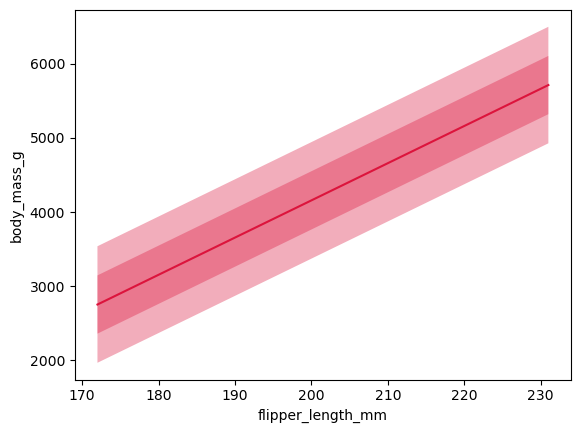

In [72]:
# Sort by flipper_length_mm for continuous plotting
df_viz_sorted = df_viz.sort_values('flipper_length_mm')

# Create the figure and axis
fig, ax = plt.subplots()

# True trend
ax.plot(df_viz_sorted.flipper_length_mm, 
        df_viz_sorted.trend, 
        color='crimson', 
        linewidth=1.5)

# True variation around the trend showing 2 sigma intervals
ax.fill_between(df_viz_sorted.flipper_length_mm, 
                df_viz_sorted.obs_lwr_95, 
                df_viz_sorted.obs_upr_95, 
                facecolor='crimson', 
                alpha=0.35)
ax.fill_between(df_viz_sorted.flipper_length_mm, 
                df_viz_sorted.obs_lwr_68, 
                df_viz_sorted.obs_upr_68, 
                facecolor='crimson', 
                alpha=0.35)

# Set labels
ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('body_mass_g')

# Show the plot
plt.show()

### Calculate the trend given the input values.

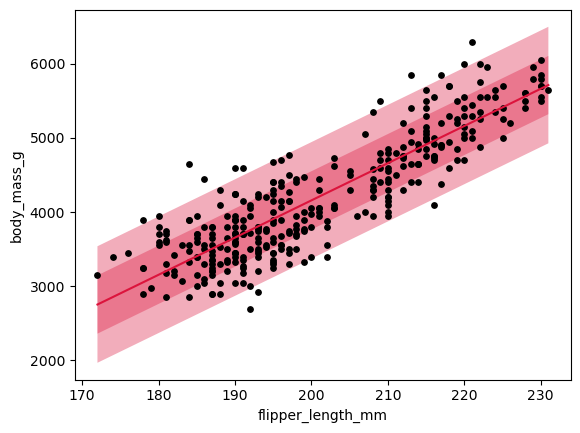

In [73]:
# Sort by flipper_length_mm for continuous plotting
df_viz_sorted = df_viz.sort_values('flipper_length_mm')

# Create the figure and axis
fig, ax = plt.subplots()

# True trend
ax.plot(df_viz_sorted.flipper_length_mm, 
        df_viz_sorted.trend, 
        color='crimson', 
        linewidth=1.5)

# True variation around the trend showing 2 sigma intervals
ax.fill_between(df_viz_sorted.flipper_length_mm, 
                df_viz_sorted.obs_lwr_95, 
                df_viz_sorted.obs_upr_95, 
                facecolor='crimson', 
                alpha=0.35)
ax.fill_between(df_viz_sorted.flipper_length_mm, 
                df_viz_sorted.obs_lwr_68, 
                df_viz_sorted.obs_upr_68, 
                facecolor='crimson', 
                alpha=0.35)

# Include the randomly generated small data set as a scatter plot
ax.scatter(df.flipper_length_mm, 
           df.body_mass_g,
           s=15, 
           color='k')

# Set labels
ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('body_mass_g')

# Show the plot
plt.show()